# 주성분 분석을 통한 비지도 차원 축소

* 특성 선택과 마찬가지로 여러 특성 추출 기법을 사용하여 데이터셋의 특성 개수를 줄일 수 있음
* 특성 선택과 특성 추출의 차이는 원본 특성을 유지하느냐에 있다
* pca는 새로운 특성 공간으로 데이터를 변환하거나 투영함
* 차원 축소 관점에서 보면 pca는 대부분 관려 있는 정보를 유지하면서 데이터를 압축하는 방법으로 이해
* pca가 학습 알고리즘의 계산 효율성을 향상할 뿐만 아니라 차원의 저주 문제를 감소시켜 예측 성능을 향상하기도 함
* 특히, 규제가 없는 모델로 작업할 때 더욱 그럼

### 주성분 분석의 주요 단계
* 비지도 선형 변환 기법인 PCA
* 주로 특성 추출과 차원 축소 용도로 많은 분야에서 널리 사용함
* PCA를 많이 사용하는 애플리케이션에는 탐색적 데이터 분석과 주식 거래 시장 잡음 제거, 생물정보학의 게놈 데이터나 유전자 발현 분석 등
* PCA는 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영함
* 새로운 부분 공간의 직교 좌표(주성분(principal component))는 주어진 조건하에서 분산이 최대한 방향으로 해석할 수 있음. 새로운 특성 축과 직각을 이룸

* PCA를 사용하여 차원을 축소하기 위해 d x k 차원의 변환 행렬 W를 만듬. 이 행렬로 샘플 벡터 x를 새로운 k 차원의 특성 부분 공간으로 매핑함
* 이 부분 공간은 원본 d 차원의 특성 공간 보다 작은 차원을 가짐
* 원본 d 차원 데이터를 새로운 k 차원의 부분 공간(일반적으로 k << d)으로 변환하여 만들어진 첫번째 주성분이 가장 큰 분산을 가짐
* 입력 특성에 상관관계가 있더라도 만들어진 주성분은 서로 직각을 이룸(상관관계가 없음)
* PCA 방향은 데이터 스케일에 매우 민감함
* 특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리 해야함

##### 차원 축소를 위한 PCA 알고리즘 전 사용할 방법 알아보기

1. d 차원 데이터셋을 표준화 전처리함
2. covariance matrix(공분산행렬)을 만듬
3. covariacne matrix를 고유벡터(eigenvector)와 고윳값(eigenvalue)으로 분해함
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매김
5. 고윳값이 가장 큰 k 개의 고유 벡터를 선택함. 여기서 k는 새로운 특성 부분 공간의 차원 (k <= d)
6. 최상의 k개의 고유 벡터로 projection matrix(투영 행렬) W를 만듬
7. 투영 행렬 W를 사용해서 d 차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환함

### 주성분 추출 단계
-- PCA 처음 네 단계를 처리함
1. 데이터를 표준화 전처리함
2. covariance matrix를 구성함
3. 공분산 행렬의 고윳값과 고유 벡터를 구함
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매김

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# 특성을 표준화 전처리
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

* 공분산 행렬은 d x d 차원의 대칭 행렬로 특성 상호 간의 공분산을 저장함. d는 데이터셋에 있는 차원 개수

In [3]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값\n%s' % (eigen_vals))


고윳값
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


* ```numpy.cov``` 함수를 사용하여 표준화 전처리된 훈련 데이터셋의 공분산 행렬을 계산함
* ```linalg.eig```함수를 사용하여 고윳값 분해를 수행함
* 이를 통해 각 고윳값에 대응하는 고유 벡터가 열에 저장된 차원의 행렬을 얻음

* ```numpy.linalg.eig```함수는 대칭과 비대칭 정방 행렬을 모두 다룰 수 있지만 이따금 복소수 고윳값을 반환함
* 이와 비슷하게 에르미트 행렬을 분해하기 위해 구현된 ```numpy.linalg.eigh```함수는 공분산 행렬과 같은 대칭 행렬을 다룰 때 수치적으로 더 안정된 결과를 만듬, 즉 ```numpy.linalg.eigh```는 항상 실수 고윳값을 반환함

### 총분산과 설명된 분산

* 데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에 가장 많은 정보를 가진 고유 벡터(주성분) 일부만 선택함
* 고윳값은 고유 벡터의 크기를 결정하므로 고윳값을 내림차순으로 정렬
* 고윳값 순서에 따라 최상위 k개의 고유 벡터를 선택함
* 가장 정보가 많은 k개의 고유 벡터를 선택하기 전에 고윳값의 설명된 분산(explained variance) 비율을 그래프로 그릴 수 있음

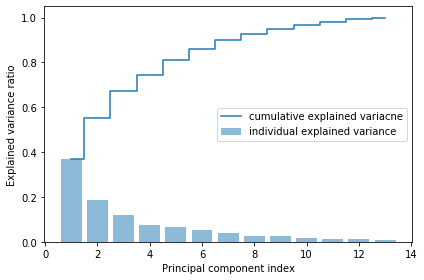

In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label = 'cumulative explained variacne')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* PCA는 비지도 학습, 클래스 레이블에 관한 정보는 사용X. 랜덤 포레스트는 클래스 소속 정보를 사용하여 노드의 불순도를 계산하는 반면 분산은 특성 축을 따라 값들이 퍼진 정도를 측정함

### 특성 변환

* 공분산 행렬을 고유벡터와 고윳값 쌍으로 분해한 후 Wine 데이터셋을 새로운 주성분 축으으로 변환하는 나머지 세 단계 진행.

-- 순서
1. 고윳값이 가장 큰 k개의 고유 벡터를 선택함. 여기서 k는 새로운 특성 부분 공간의 차원 (k <= d)
2. 최상위 k개의 고유 벡터로 투영 행렬 W를 만듬
3. 투영 행렬 W를 사용해서 d 차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환함


* 고윳값의 내림차순으로 고유 벡터를 정렬하고 선택된 고유 벡터로 투영 행렬을 구성함
* 이 투영 행렬을 사용하여 데이터를 저차원 부분 공간으로 변환함

In [6]:
# (고윳값, 고유 벡터) 튜플의 리스트를 만듬
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
              for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유 벡터) 튜플을 정렬함
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

* 가장 큰 두개의 고윳값에 해당하는 고유 벡터를 선택함. 이 데이터셋에 있는 분산의 약 60%를 잡아낼 수 있음
* 예제에서는 나중에 2차원 산점도를 그리기 위해 두 개의 고유벡터만 선택함
* 실전에서는 계산 효율성과 모델 성능 사이의 절충점을 찾아 주성분 개수를 결정해야 함ㅁ

In [8]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W: \n', w)

투영 행렬 W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


* 앞 코드를 실행하여 최상위 두 개의 고유 벡터로부터 13 x 2 차원의 투영 행렬 W를 만듬

### 사이킷런의 주성분 분석

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

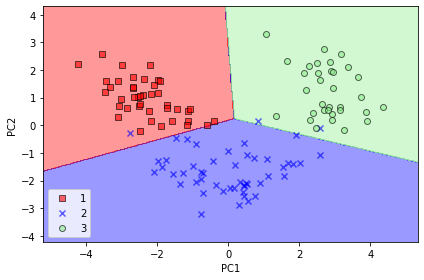

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

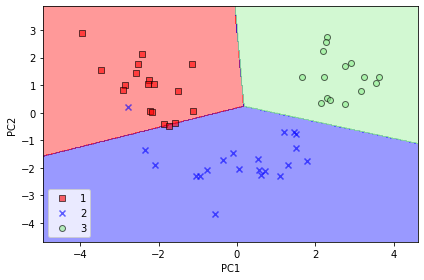

In [19]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

* 전체 주성분의 설명된 분산 비율을 알고 싶다면 n_components 매개변수를 None으로 지정하고 PCA 클래스의 객체를 만들면 됨
* ```explained_variance_ratio_```속성에서 모든 주성분의 설명된 분산 비율을 확인할 수 있음

In [11]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

* PCA 클래스의 객체를 만들 때 n_compoenets=None이라고 지정했기 때문에 차원 축소를 수행하는 댓니 분산의 크기 순서대로 모든 주성분이 반환됨

# 선형 판별 분석을 통한 지도 방식의 데이터 압축
* 선형 판별 분석(LDA)은 규제가 없는 모델에서 차원의 저주로 인한 과대적합 정도를 줄이고 게산 효율성을 높이기 위한 특성 추출의 기법으로 사용할 수 있음

* LDA 이면에 있는 일반적인 개념은 PCA와 매우 비슷함.
* LDA는 지도학습 / PCA는 비지도학습
* LDA가 PCA보다 분류 작업에서 뛰어난 특성 추출 기법. PCA는 특정 이미지 인식 작업에 뛰어난 분류 결과를 내는 경향이 있음(예를 들어 각 클래스에 속한 샘플이 몇개 되지 않을 때)
* LDA는 데이터가 정규 분포라고 가정함. 또 클래스가 동일한 공분산 행렬을 가지고 샘플은 서로 통게적으로 독립적이라고 가정함
* 하나 이상의 가정이 조금 위반되더라도 여전히 LDA는 차원 축소를 잘 수행한다

### LDA 판별 분석의 내부 동작 방식
--순서
1. d 차원의 데이터 셋을 표준화 전처리함(d는 특성 개수)
2. 각 클래스에 대해 d 차원의 평균 벡터를 계산함
3. 클래스 간의 산포 행렬(scatter matrix) S_b와 클래스 내 산포행렬 S_w를 구성함
4. (S_w)^-1 * S_b 행렬의 고유 벡터와 고윳값을 계산함
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매김
6. 고윳값이 가장 큰 k개으 ㅣ고유 벡터를 선택하여 d x k 차원의 변환 행렬 W를 구성함. 이 행렬의 열이 고유 벡터
7. 변환 행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영함


* LDA는 행렬을 고윳값과 고유 벡터로 분해하여 새로운 저차원 특성 공간을 구성한다는 점에서 PCA와 매우 닮았음.
* LDA는 단계 2에서 계산하는 평균 벡터를 만드는 데 클래스 레이블 정보를 사용함.
* 클래스 레이블별로 데이터를 나누어 평균을 구성함.

### 사이킷런의 LDA

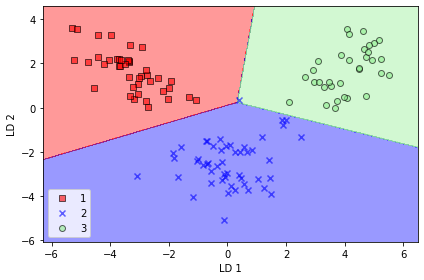

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train) # 지도학습 이므로

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

* 규제 강도를 낮추어 조정 가능/. 하지만 더 중요한건 테스트 셋 결과

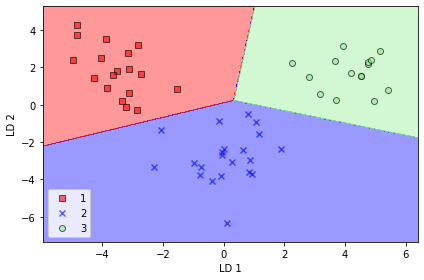

In [21]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

# 커널 PCA를 사용하여 비선형 매핑
* 많은 머신러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다는 가정을 함.
* 퍼셉트론은 수렴하기 위해 훈련 데이터가 선형적으로 완벽하게 분리 가능해야 한다고 배움
* 지금까지 다루었던 다른 알고리즘들은 선형적으로 완벽하게 분리 되지 못한 이유를 잡음 때문이라고 가정함(아달린, 로지스틱, SVM(기본))

* RBF 커널 PCA를 구현하기 위한 세 단계를 정의함


--순서
1. 커널(유사도) 행렬 K를 식으로 계산(샘플의 모든 쌍에 대해 구하며, 100개의 훈련 샘플이 담긴 데이터셋이라면 각 쌍의 유사도를 담은 대칭 커널 행렬은 100x100차원이 됨
2. 커널 행렬 K를 중앙에 맞춤
3. 고윳값 크기대로 내림차순으로 정렬하여 중앙에 맞춘 커널 행렬에서 최상위 k개의 고유 벡터를 고름. 표준 PCA와 다르게 고유 벡터는 주성분 축이 아니며, 이미 이 축에 투영된 샘플임

### 파이썬으로 커널 PCA 구현

In [22]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    '''
    RBF 커널 PCA 구현
    
    매개변수
    -------------------------
    
    X: {넘파이 ndarray}, shape = [n_samples, n_features]
    
    
    gamma : float
        RBF 커널 튜닝 매개변수
        
    
    n_components: int
        반환할 주성분 개수
        
    
    반환값
    -------------------------
    X_pc: {넘파이 ndarray}, shape = [n_samples, k_features]
        투영된 데이터셋

    '''
    
    # MxN 차원의 데이터 셋에서 샘플 간의 유클리디안 거리의 제곱을 계산함
    sq_dists = pdist(X, 'sqeuclidean')
    
    # 샘플 간의 거리를 정방 대칭 행렬로 변환함
    mat_sq_dists = squareform(sq_dists)
    
    # 커널 행렬을 계산함
    K = exp(-gamma * mat_sq_dists)
    
    # 커널 행렬을 중앙에 맞춤
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구함
    # scipy.linalg.eigh 함수는 오름차순으로 반환
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # 최상위 k개의 고유 벡터를 선택함(투영 결과)
    X_pc = np.column_stack([eigvecs[:, i]
                           for i in range(n_components)])
    
    return X_pc

* 차원축소에 RBF 커널 PCA를 사용하는 한 가지 단점이 사전에 감마 매개변수를 지정해야 한다는 것.
* 적절한 감마값을 찾으려면 실험해야 하며, 그리드 서치같은 매개변수 튜닝을 위한 알고리즘을 사용하는 것이 최선

* rbf_kernel_pca 함수를 비선형 데이터셋에 적용

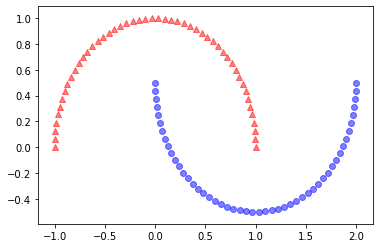

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

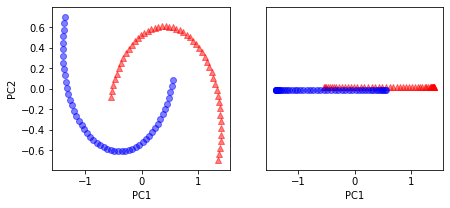

In [26]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()